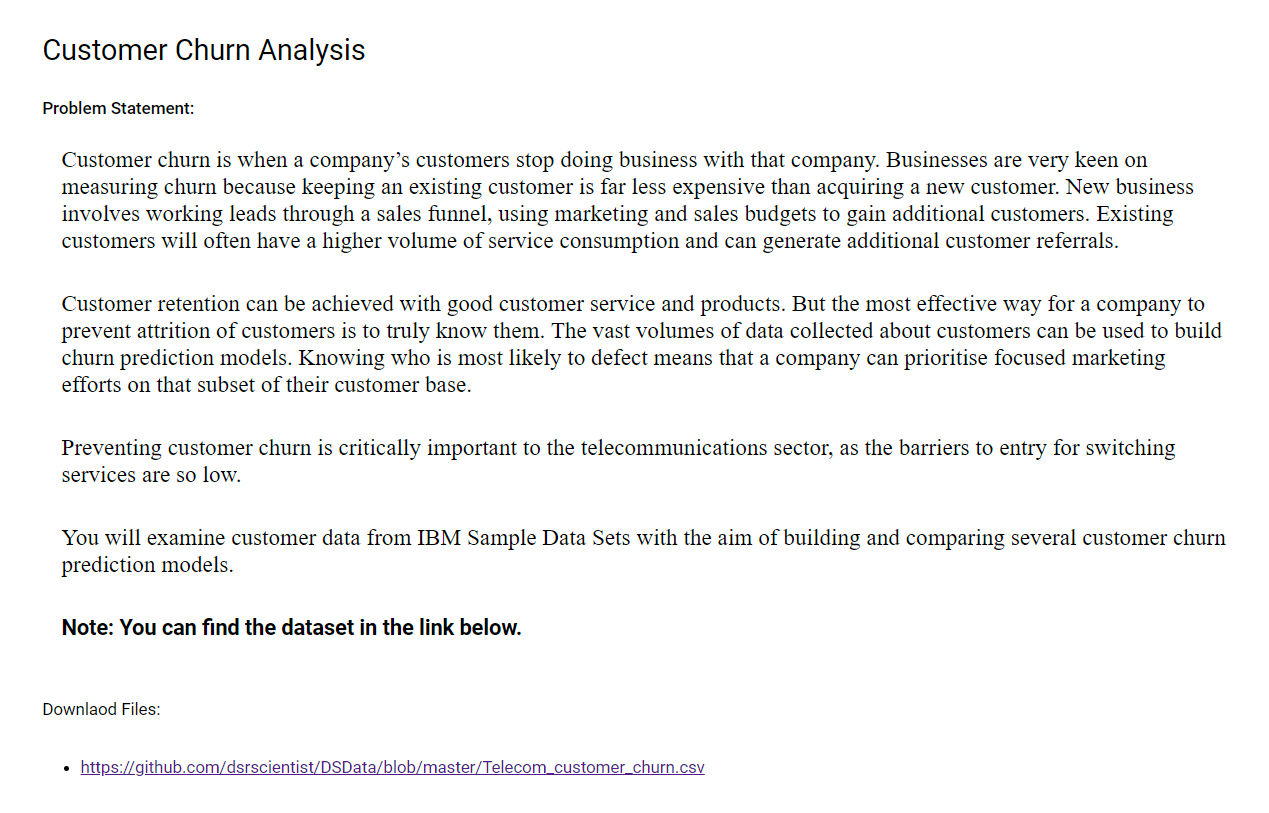

In [1]:
# importing requred libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Telecom_customer_churn.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [3]:
df.shape

(7043, 21)

# Observation

this dataset has 7043 rows and 21 columns

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Observation

We have float, integer and object data in dataset. we should do encoding for object data

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# observation

comparing 50% and mean Tenure and monthly charges have skewness , 

comparing 75% and max almost all columns have outliers

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# null value check

<AxesSubplot:>

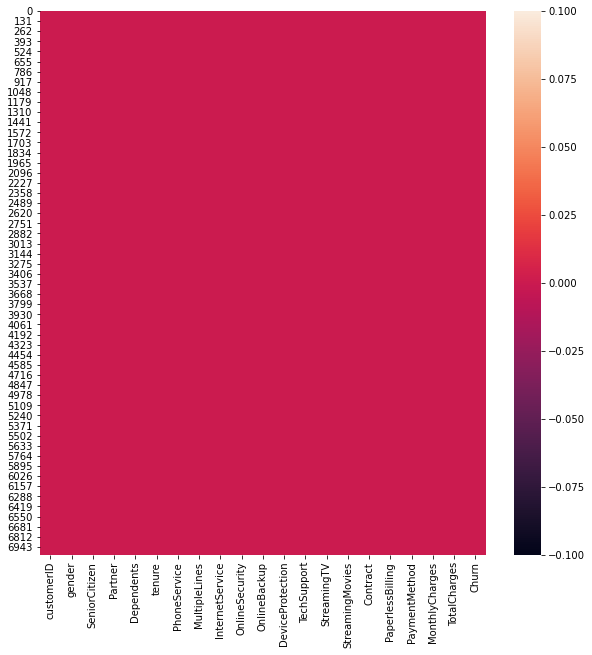

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

# observation

There are No Null Values

# univariate analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

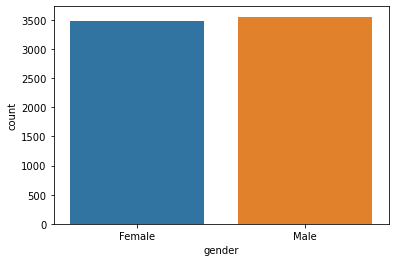

In [10]:
sns.countplot(df[ 'gender'])

# observation

Female and Male have equal amount of data

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

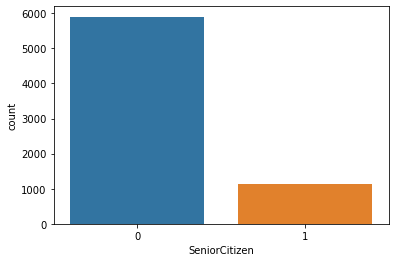

In [11]:
sns.countplot(df['SeniorCitizen'])

# observation

Senior Citzen users are  very low

<AxesSubplot:xlabel='Partner', ylabel='count'>

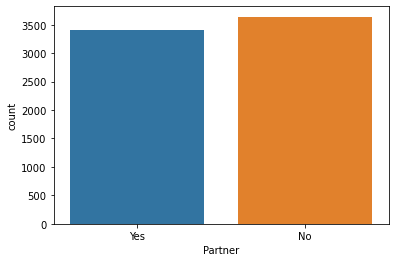

In [12]:
sns.countplot(df[ 'Partner'])

# observation

almost equal no of people have and dont have partners

<AxesSubplot:xlabel='Dependents', ylabel='count'>

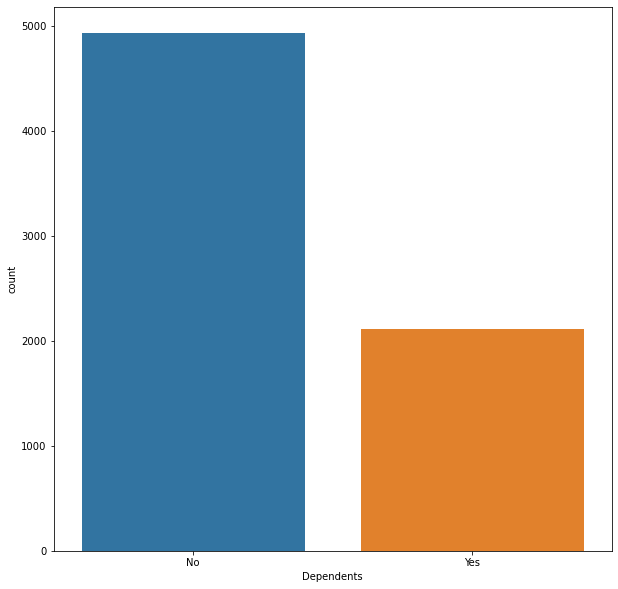

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(df['Dependents'])

# observation

No dependents data is more

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

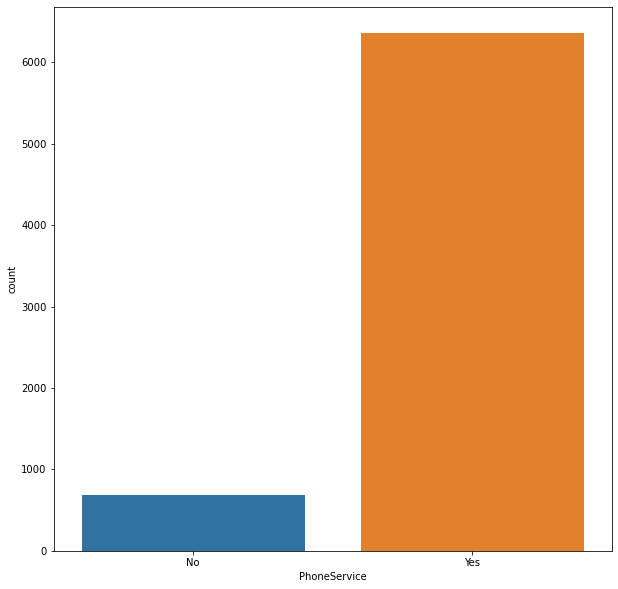

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(df['PhoneService'])

# Observation

Phone Servcie yes data is more compared to no

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

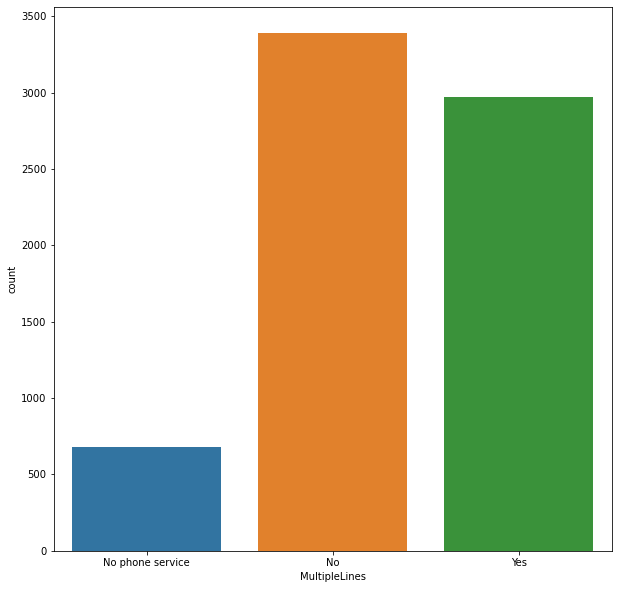

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(df['MultipleLines'])

# observation

Multiples lines no data is higher

<AxesSubplot:xlabel='InternetService', ylabel='count'>

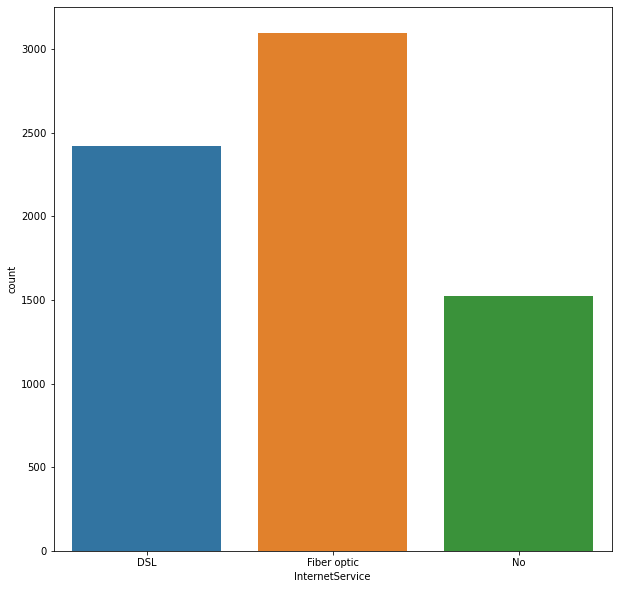

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df['InternetService'])

# observation

Fiber optic service is high as its latest technology

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

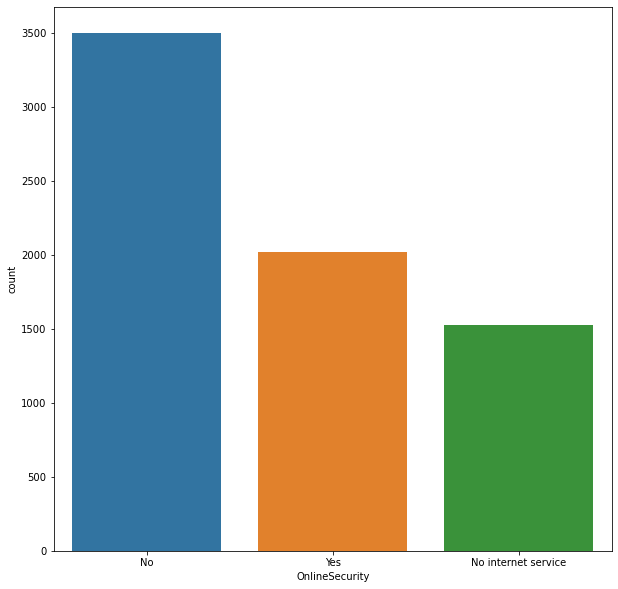

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(df[ 'OnlineSecurity'])

# observation

OnlineSecurity is not offered mostly

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

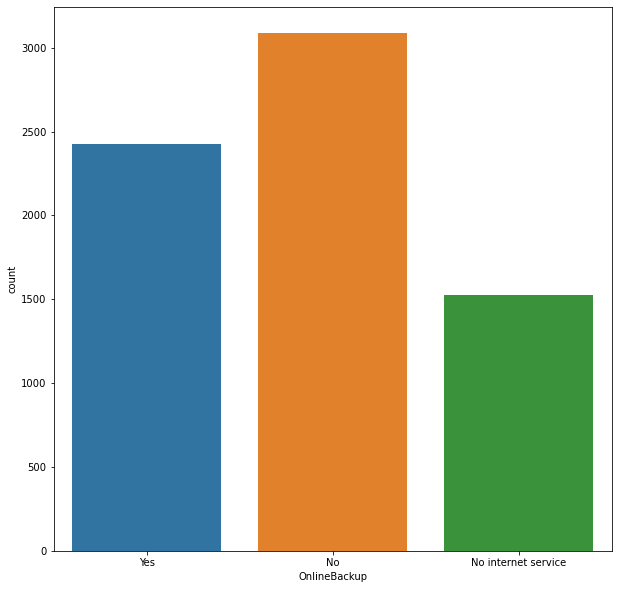

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(df[ 'OnlineBackup'])

# Observation

no online backup is provided by most

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

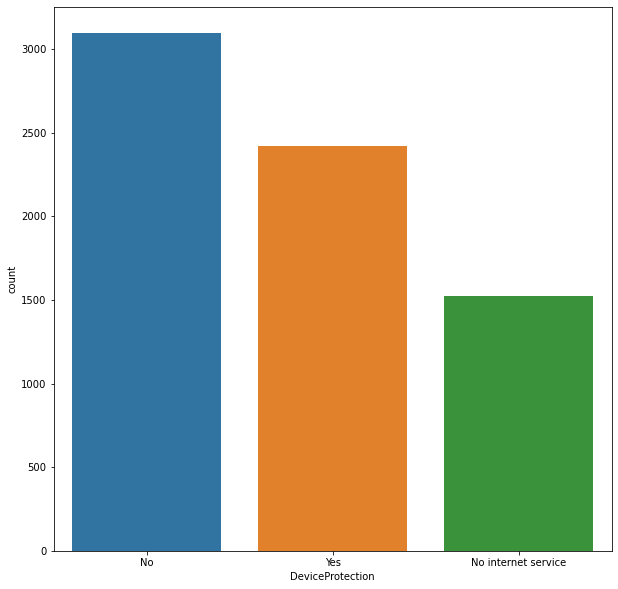

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(df[ 'DeviceProtection'])

# Observation

Device protection is not offered by most

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

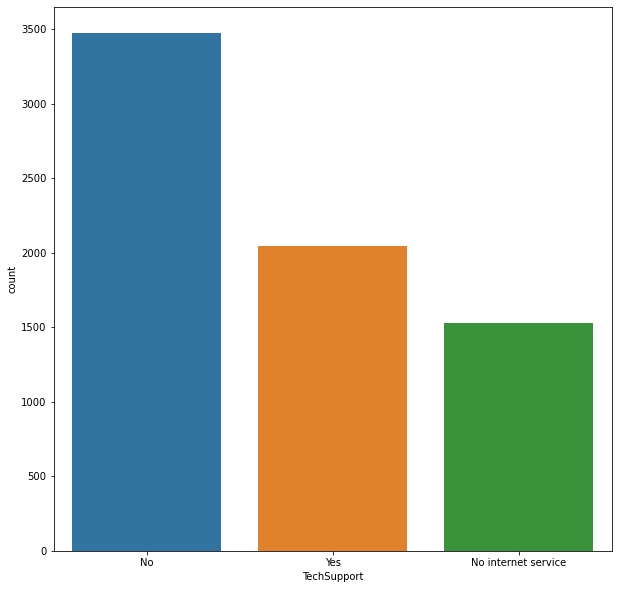

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(df['TechSupport'])

# observation

Tech support is not provided by most

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

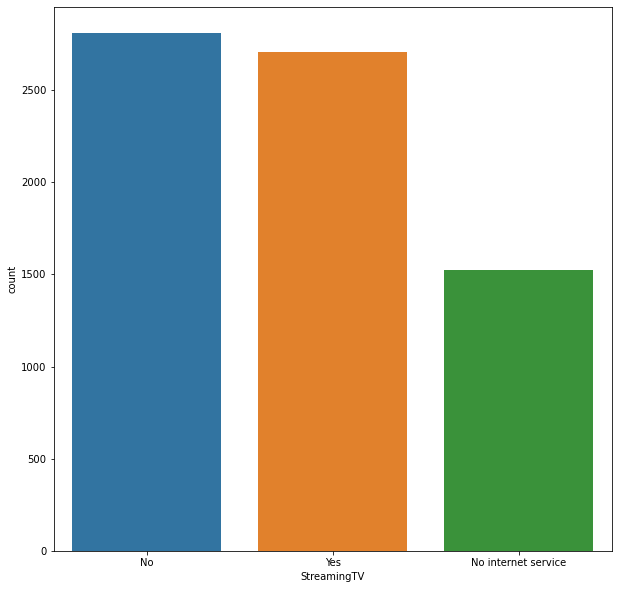

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(df['StreamingTV'])

# Observation

Streaming TV is offered and not offered equally by all

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

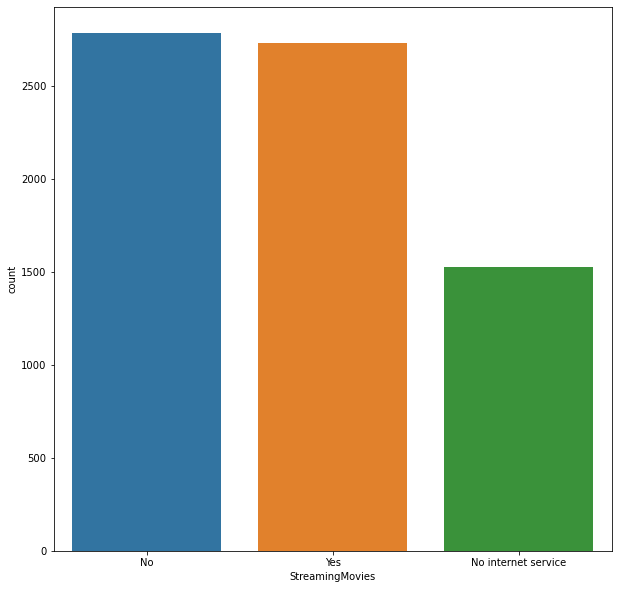

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(df[ 'StreamingMovies'])

# Observation

Streaming TV is offered and not offered equally by all

<AxesSubplot:xlabel='Contract', ylabel='count'>

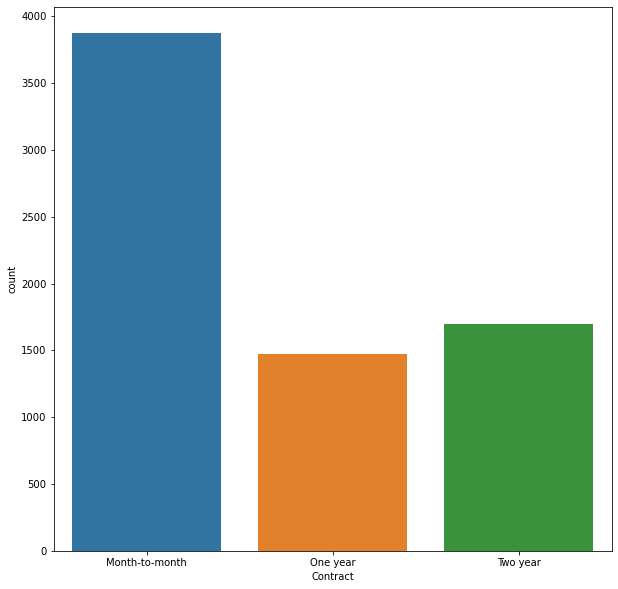

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(df['Contract'])

# observation

Month to month contract data is higher 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

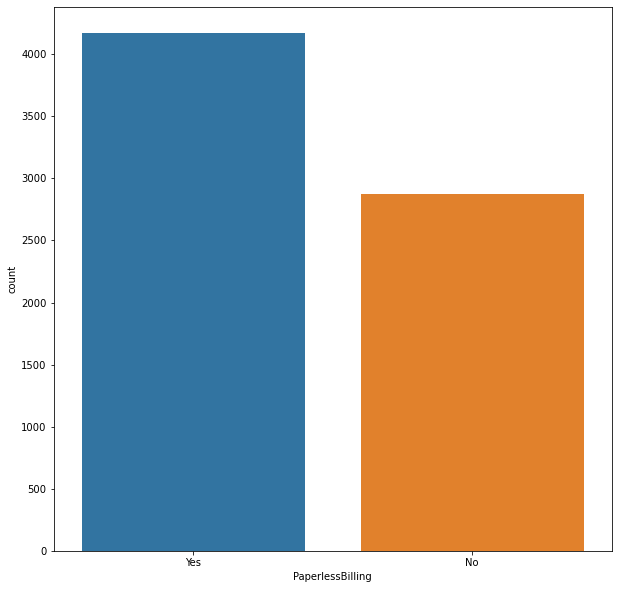

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(df['PaperlessBilling'])

# observation

most of paperless billing is given by operators

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

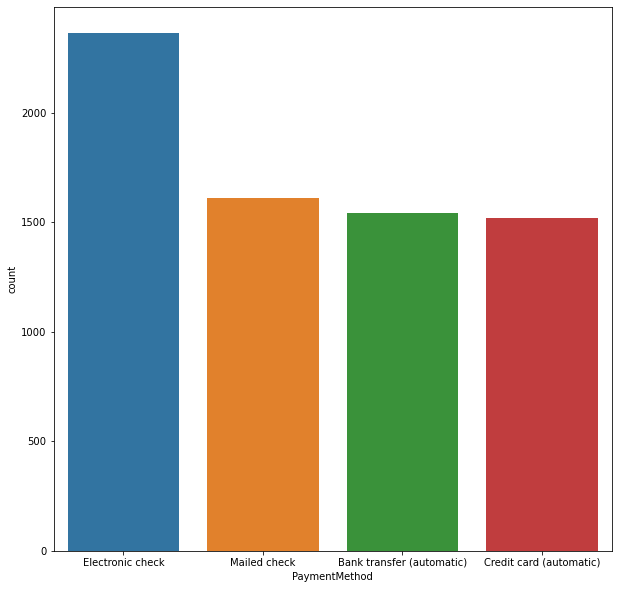

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(df['PaymentMethod'])

# Observation

Electronic check is mostly preferred

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

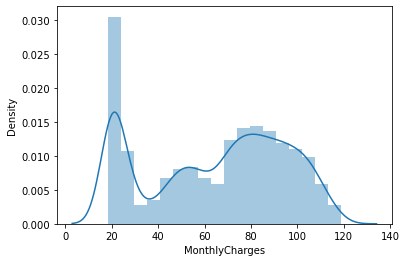

In [32]:
sns.distplot(df['MonthlyCharges'])

# observation

Monthly charges is negatively skewed

# Bivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='Churn'>

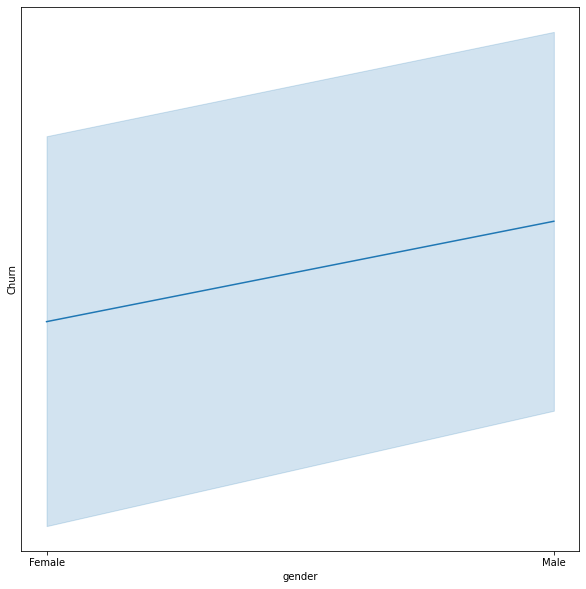

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot(df['gender'],df['Churn'])

# Observation

Male data has higher churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

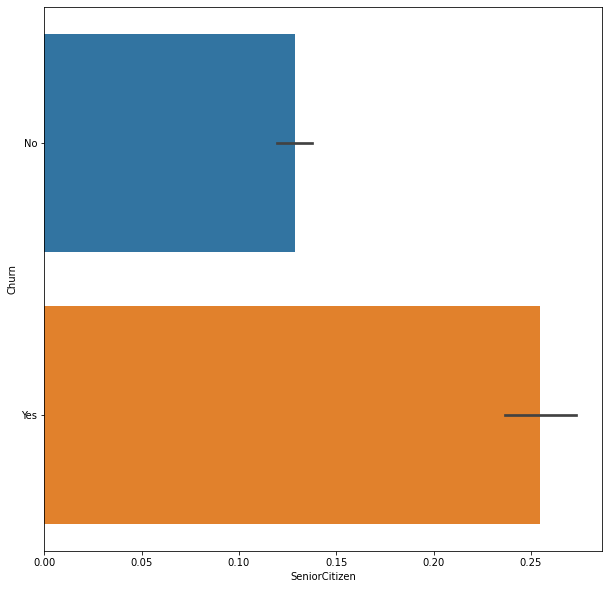

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(df['SeniorCitizen'],df['Churn'])

# Observation

Senior citlizen has higher churn

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

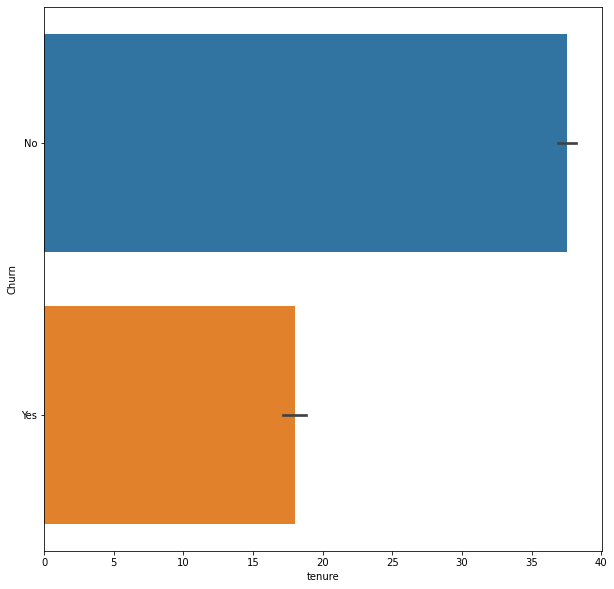

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(df['tenure'],df['Churn'])

# Observation

if tenure is high churn is less but if tenure is low churn is higher

<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

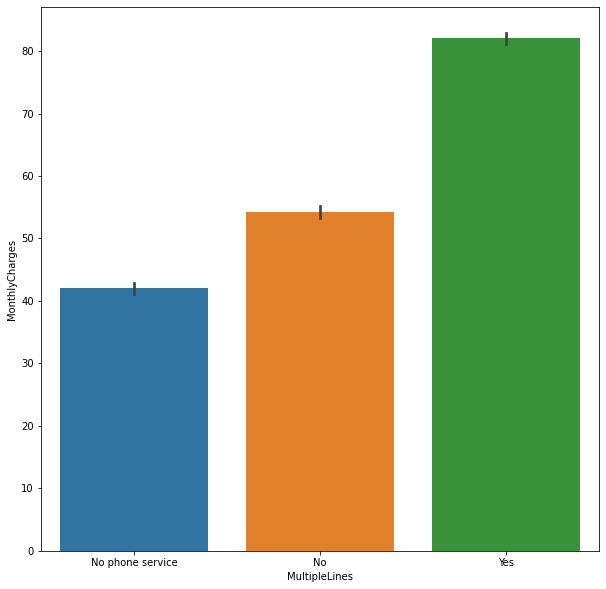

In [50]:
plt.figure(figsize=(10,10))
sns.barplot(df['MultipleLines'],df['MonthlyCharges'])

# observations

 Monthly Charges is higher for mulitple lines

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

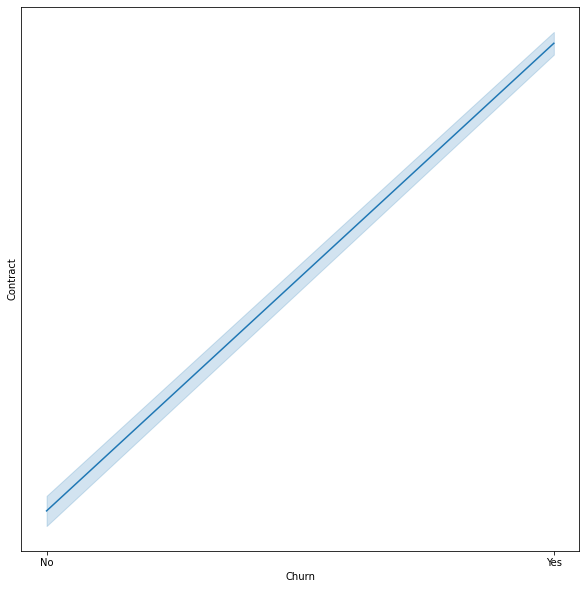

In [54]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df['Contract'])

# Observation

Churn and contract are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

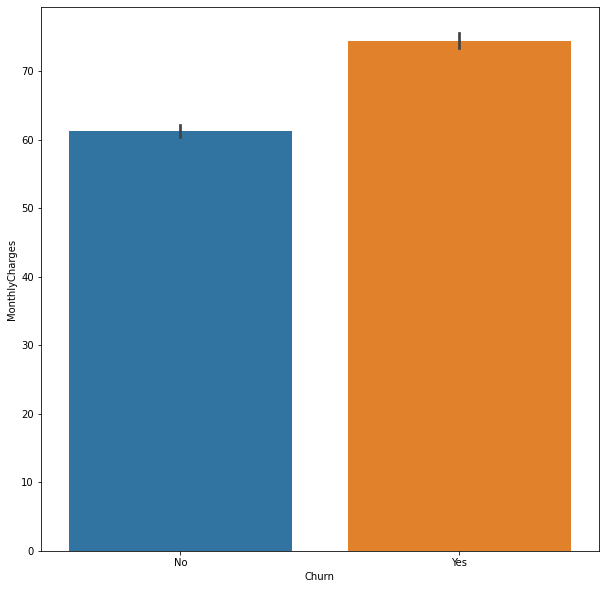

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(df['Churn'],df[ 'MonthlyCharges'])

# Observation

Churn is higher for higher monthly charges

<AxesSubplot:xlabel='Churn', ylabel='OnlineSecurity'>

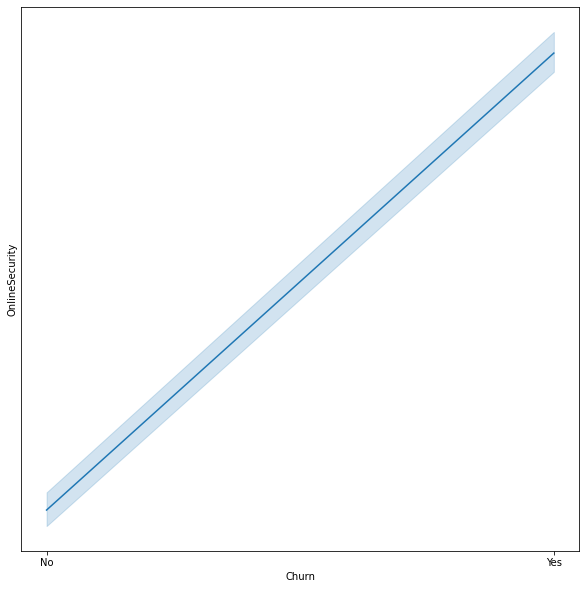

In [61]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df['OnlineSecurity'])

# Observation

Churn and online security are Positively correlated

<AxesSubplot:xlabel='Churn', ylabel='OnlineBackup'>

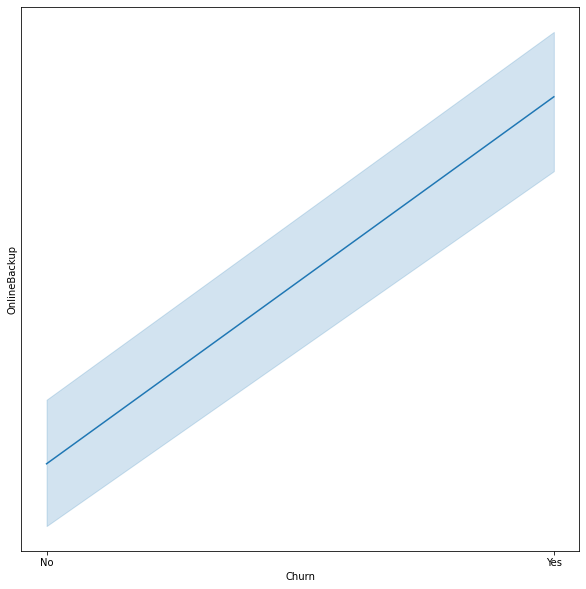

In [62]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df['OnlineBackup'])

# Observation

Churn and Online backup are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='DeviceProtection'>

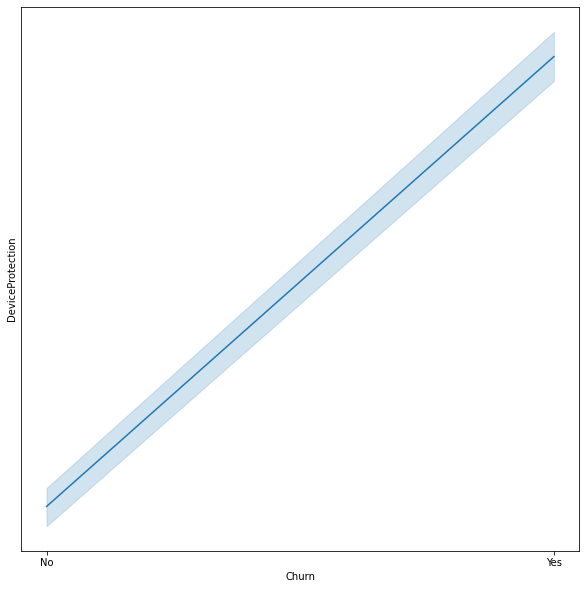

In [63]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df['DeviceProtection'])

# Observation

Churn and Deivce protection are positvely correlated

<AxesSubplot:xlabel='Churn', ylabel='StreamingTV'>

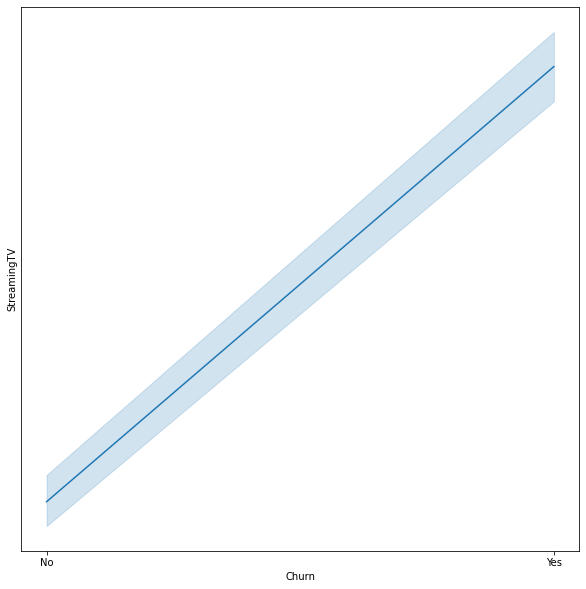

In [64]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df['StreamingTV'])

# Observaiton

Churn and Streaming Tv are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='StreamingMovies'>

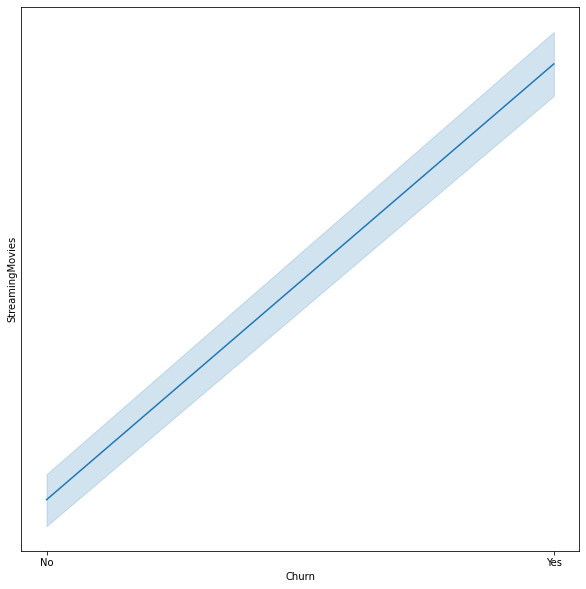

In [66]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df[ 'StreamingMovies'])

# Observation

Churn and Streaming tv are posively correlated

<AxesSubplot:xlabel='Churn', ylabel='PaymentMethod'>

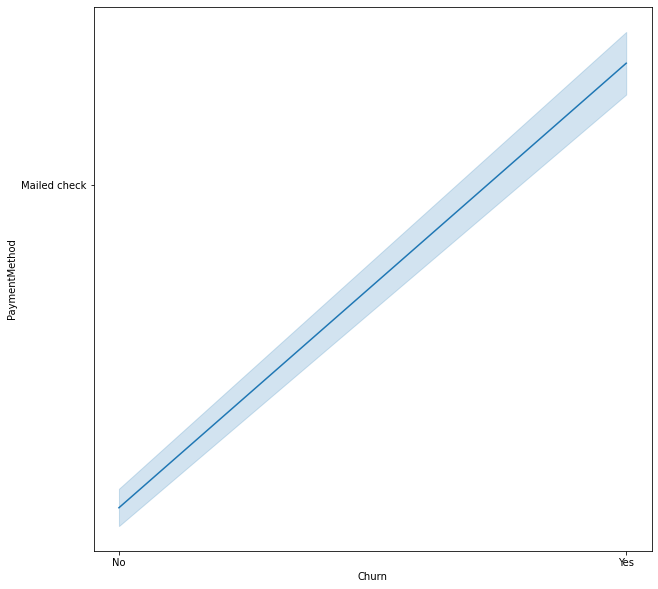

In [67]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df['PaymentMethod'])

# observation

churn and payment moethod are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='PaperlessBilling'>

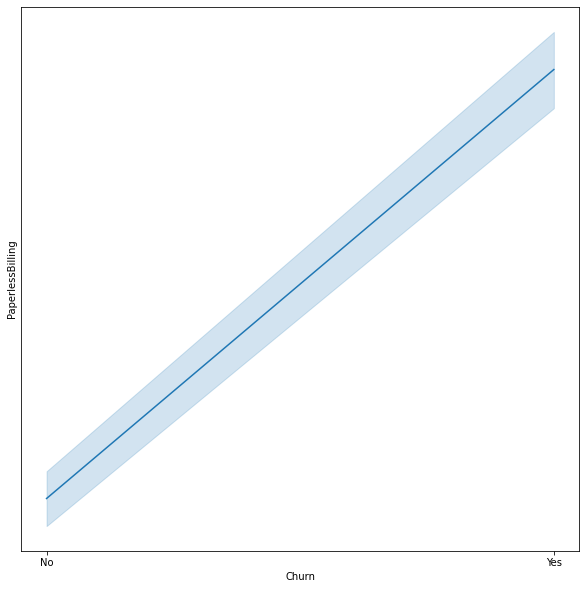

In [68]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Churn'],df['PaperlessBilling'])

# observation

Churn and Paperless billing are positively correlated

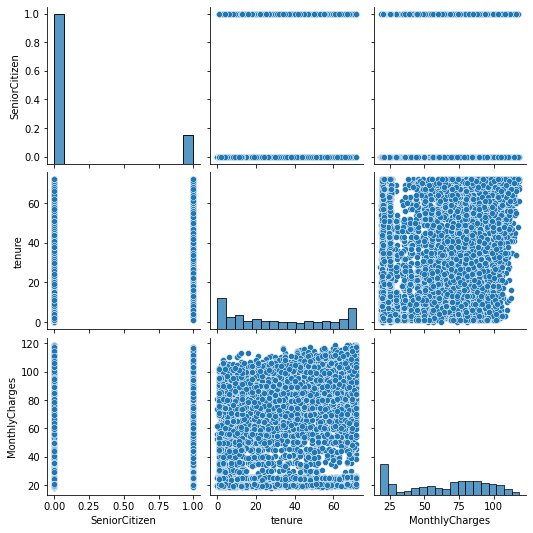

In [70]:
sns.pairplot(df)

# Encoding

In [71]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')

In [6]:
df.drop("customerID",inplace=True,axis=1)

# Observation

We are dropping customer id as it does not have signifcance in this dataset 

now i need to encode categorical data

# Observation

In [7]:
ordinal = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','StreamingMovies']

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [9]:
le = LabelEncoder()
oe = OrdinalEncoder()

for ordi in ordinal:
    df[ordi] = oe.fit_transform(df[ordi].values.reshape(-1,1))
    
df["Churn"] = le.fit_transform(df["Churn"].values.reshape(-1,1))

In [10]:
df.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

# Observation

now all the object data is converted to numeric using encoding

# i can see after encoding totalcharges has null values so removing null values using simple inputer

In [ ]:
df["TotalCharges"].isnull().sum()

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
si = SimpleImputer(strategy='mean')
df["TotalCharges"] = si.fit_transform(df["TotalCharges"].values.reshape(-1,1))

In [18]:
df["TotalCharges"].isnull().sum()

0

# Correlation

<AxesSubplot:>

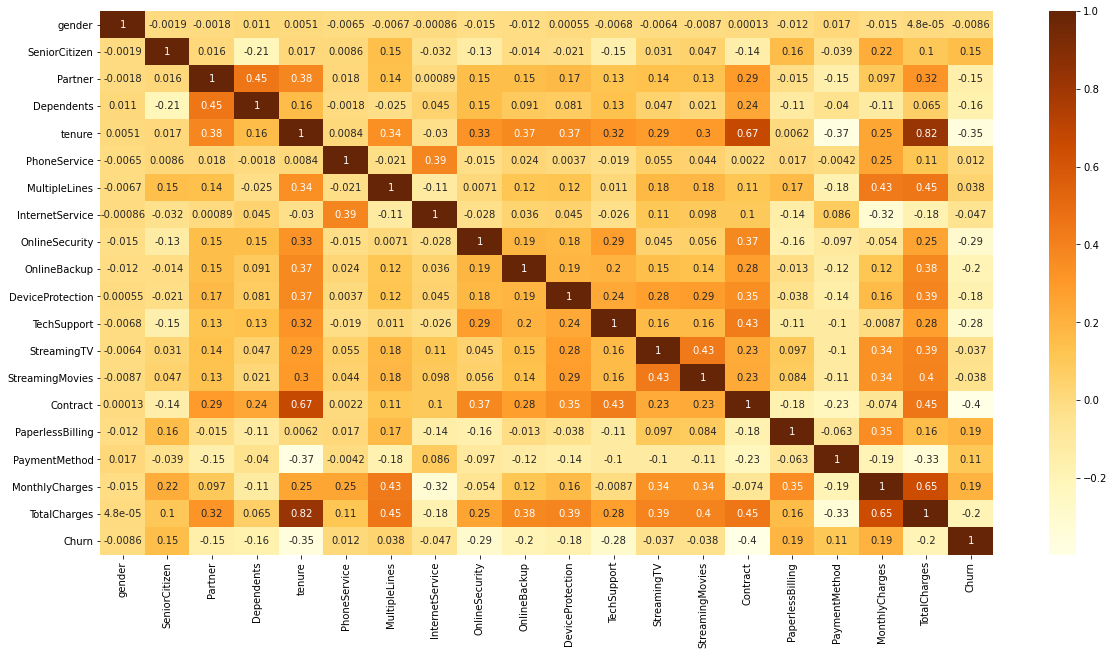

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [84]:
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

# observation

MonthlyCharges,PaperlessBilling,SeniorCitizen are positively correlated to Churn

Contract,tenure,OnlineSecurity,TechSupport are negatively correalted to churn

# Skewness

In [16]:
dc1 = df.drop(["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','StreamingMovies','Churn'],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

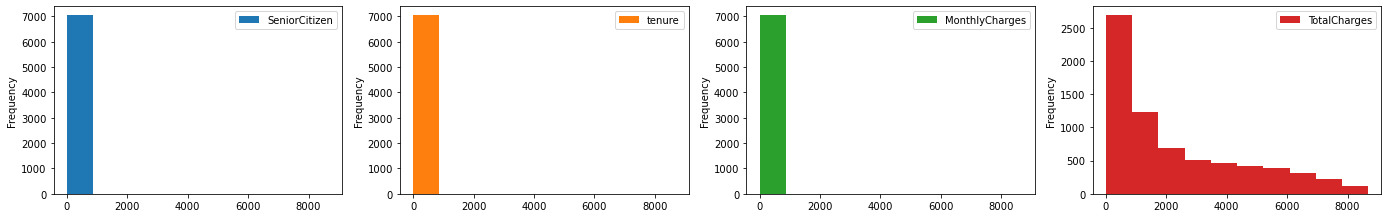

In [136]:
dc1.plot(kind="hist",subplots=True,layout=(5,5),figsize=(30,20))

In [17]:
dc1.skew().sort_values(ascending=False)

SeniorCitizen     1.833633
TotalCharges      0.962394
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

# observation

almost all features have skewness so lets proceed with power transform to remove skewness

# Using power_transform for skewness removal

In [18]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [19]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [20]:
dc2.skew()

SeniorCitizen     1.833633
tenure           -0.243325
MonthlyCharges   -0.259035
TotalCharges     -0.144899
dtype: float64

# observation

i tried using np.sqrt ,np,cbrt and log method to remove skewness on SeniorCitizen but it will not reduce

we have removed skewness

# outlier removal

SeniorCitizen        AxesSubplot(0.125,0.125;0.168478x0.755)
tenure            AxesSubplot(0.327174,0.125;0.168478x0.755)
MonthlyCharges    AxesSubplot(0.529348,0.125;0.168478x0.755)
TotalCharges      AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

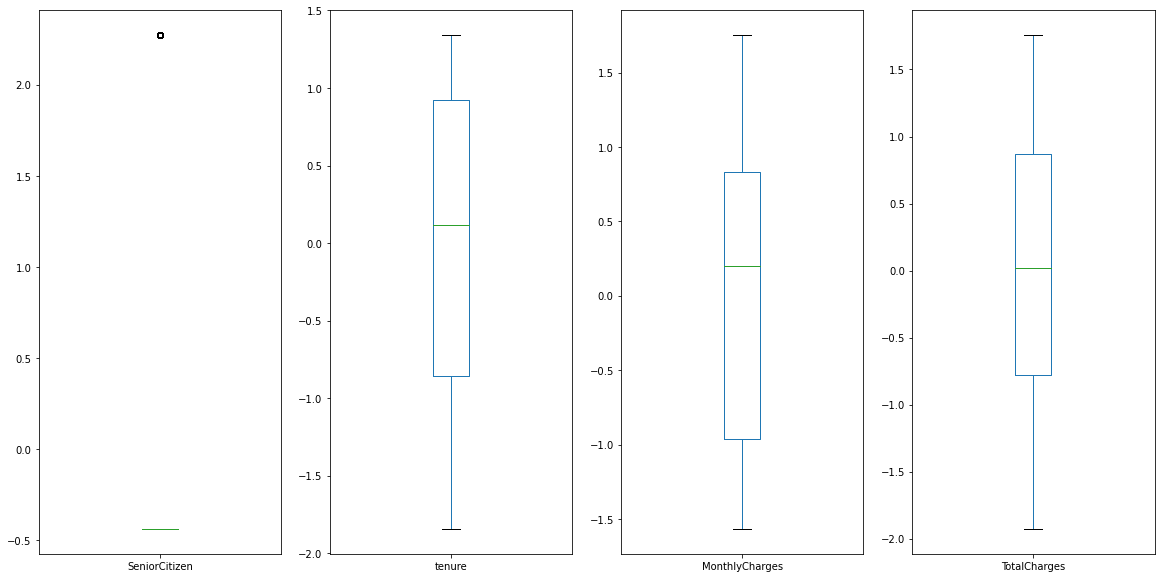

In [99]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [21]:
dc2.shape

(7043, 4)

In [22]:
from scipy.stats import zscore

In [23]:
z = np.abs(zscore(dc2))

In [24]:
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [25]:
df1 = dc2

In [26]:
df1.shape

(7043, 4)

# observation

no outliers

# creating categorical data dataframe

In [27]:
cat=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','StreamingMovies','Churn']
dfc = pd.DataFrame()
for i in cat:
    dfc[i] = df[i]
dfc.shape

(7043, 16)

# Balancing the data

<AxesSubplot:xlabel='Churn', ylabel='count'>

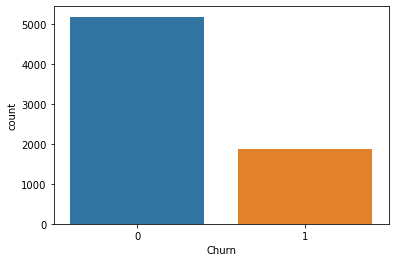

In [28]:
sns.countplot(dfc.iloc[:,-1])

# observation

data imbalance is found so removing them by SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [30]:
dfb = df1.join(dfc)
dx = dfb.drop("Churn",axis=1)
dy = dfc.iloc[:,-1]

In [31]:
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='Churn', ylabel='count'>

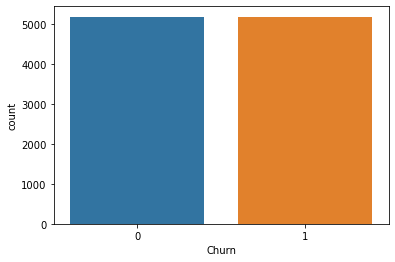

In [32]:
sns.countplot(y)

# observation

now we have removed data imbalance by SMOTE

# Multicolinearity Checking

# variance inflation factor

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(19)]
vif["feature names"] = dft.columns

In [35]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
3,46.634362,TotalCharges
1,36.875303,tenure
7,10.426945,PhoneService
2,7.956723,MonthlyCharges
9,4.603455,InternetService
17,4.050143,PaymentMethod
15,3.502046,Contract
16,3.147758,PaperlessBilling
14,3.070566,StreamingTV
18,3.061606,StreamingMovies


# observation

TotalCharges has high vif index so dropping it

In [36]:
dft.drop("TotalCharges",axis=1,inplace=True)

In [37]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(18)]
vif["feature names"] = dft.columns

In [38]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
6,10.407060,PhoneService
8,4.334340,InternetService
16,4.043297,PaymentMethod
14,3.254195,Contract
15,3.146847,PaperlessBilling
13,3.069375,StreamingTV
17,3.060782,StreamingMovies
4,2.636831,Partner
1,2.575164,tenure
7,2.493302,MultipleLines


# observation

PhoneService has high vif index so dropping it

In [39]:
dft.drop("PhoneService",axis=1,inplace=True)

In [40]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(17)]
vif["feature names"] = dft.columns

In [41]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
15,3.671066,PaymentMethod
13,3.149210,Contract
12,3.064426,StreamingTV
16,3.054985,StreamingMovies
14,2.939911,PaperlessBilling
7,2.900724,InternetService
4,2.598428,Partner
6,2.481143,MultipleLines
1,2.360423,tenure
10,2.345033,DeviceProtection


# observaiton

now vif index is within limit so mulitcollinearity is removed from this data set

Multicolinearity Removed

# Standard Scaler

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
dft1 = dft.drop(["gender","Partner","Dependents","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','StreamingMovies'],axis=1)

In [44]:
sc = StandardScaler()
x = sc.fit_transform(dft1)
x_f= pd.DataFrame(x,columns=dft1.columns)

In [45]:
cat1 = ["gender","Partner","Dependents","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','StreamingMovies']
dfc1 = pd.DataFrame()
for i in cat1:
    dfc1[i] = dft[i]
dfc1.shape

(10348, 14)

In [46]:
x_final= x_f.join(dfc1)

In [47]:
x_final.shape

(10348, 17)

# observation

we have scaled the input data

# model Training starts

# Importing required libraries

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [50]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
lr=[]
fl = [dtc,knc,rfc,abc,lr]

oo=0


for i in algo:
    acc=0
    rand=0
    
    for ii in range(20,80):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)    

 the best random state is 60 and accuracy score is 0.8159420289855073 for algorithm DecisionTreeClassifier()
 the best random state is 71 and accuracy score is 0.8072463768115942 for algorithm KNeighborsClassifier()
 the best random state is 24 and accuracy score is 0.8729468599033816 for algorithm RandomForestClassifier()
 the best random state is 26 and accuracy score is 0.8415458937198068 for algorithm AdaBoostClassifier()
 the best random state is 56 and accuracy score is 0.785024154589372 for algorithm LogisticRegression()


In [52]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
2,"(DecisionTreeClassifier(max_features='auto', r...",0.873913,0.847712
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.841546,0.819006
0,DecisionTreeClassifier(),0.814493,0.791371
1,KNeighborsClassifier(),0.807246,0.795518
4,LogisticRegression(),0.785024,0.766623


In [53]:
final_result.loc[2]["Algorithm Name"]

RandomForestClassifier()

# running Support vector classifier induvidually as it consumes more memory

In [176]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.7946859903381642, the cross validation score is 0.7923304450561894 for SVC


# Observation

from all the classifier models random forest performed best with accuracy of 87 % and cross val score of  84%

# HyperParameter Tunining

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=24)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100]})

In [56]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 100}

# using the best parameters got in grid search 

In [57]:
rf = RandomForestClassifier(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=2,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=24)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.870048309178744, the cross validation score is 0.8515766911131191 


# Observation

# The accuracy score is 87% and cross val score is 85%

In [59]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1040
           1       0.86      0.88      0.87      1030

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



In [58]:
print(confusion_matrix(test_y,pred))

[[895 145]
 [124 906]]


# ROC CURVE

In [60]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

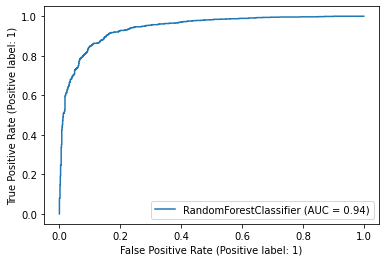

In [61]:
plot_roc_curve(rf,test_x,test_y)

In [62]:
print(f'The ROC_AUC_SCORE IS {roc_auc_score(test_y,pred)}')

The ROC_AUC_SCORE IS 0.87009428678118


# saving the model

In [63]:
import joblib
joblib.dump(rf,"CustomerChurn.pkl")

['CustomerChurn.pkl']